In [205]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [206]:
df = pd.read_csv("Decision Tree & Random Forest Problem_ Data Set - loan_data.csv")

In [207]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [208]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [210]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])
df.head()

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        2    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

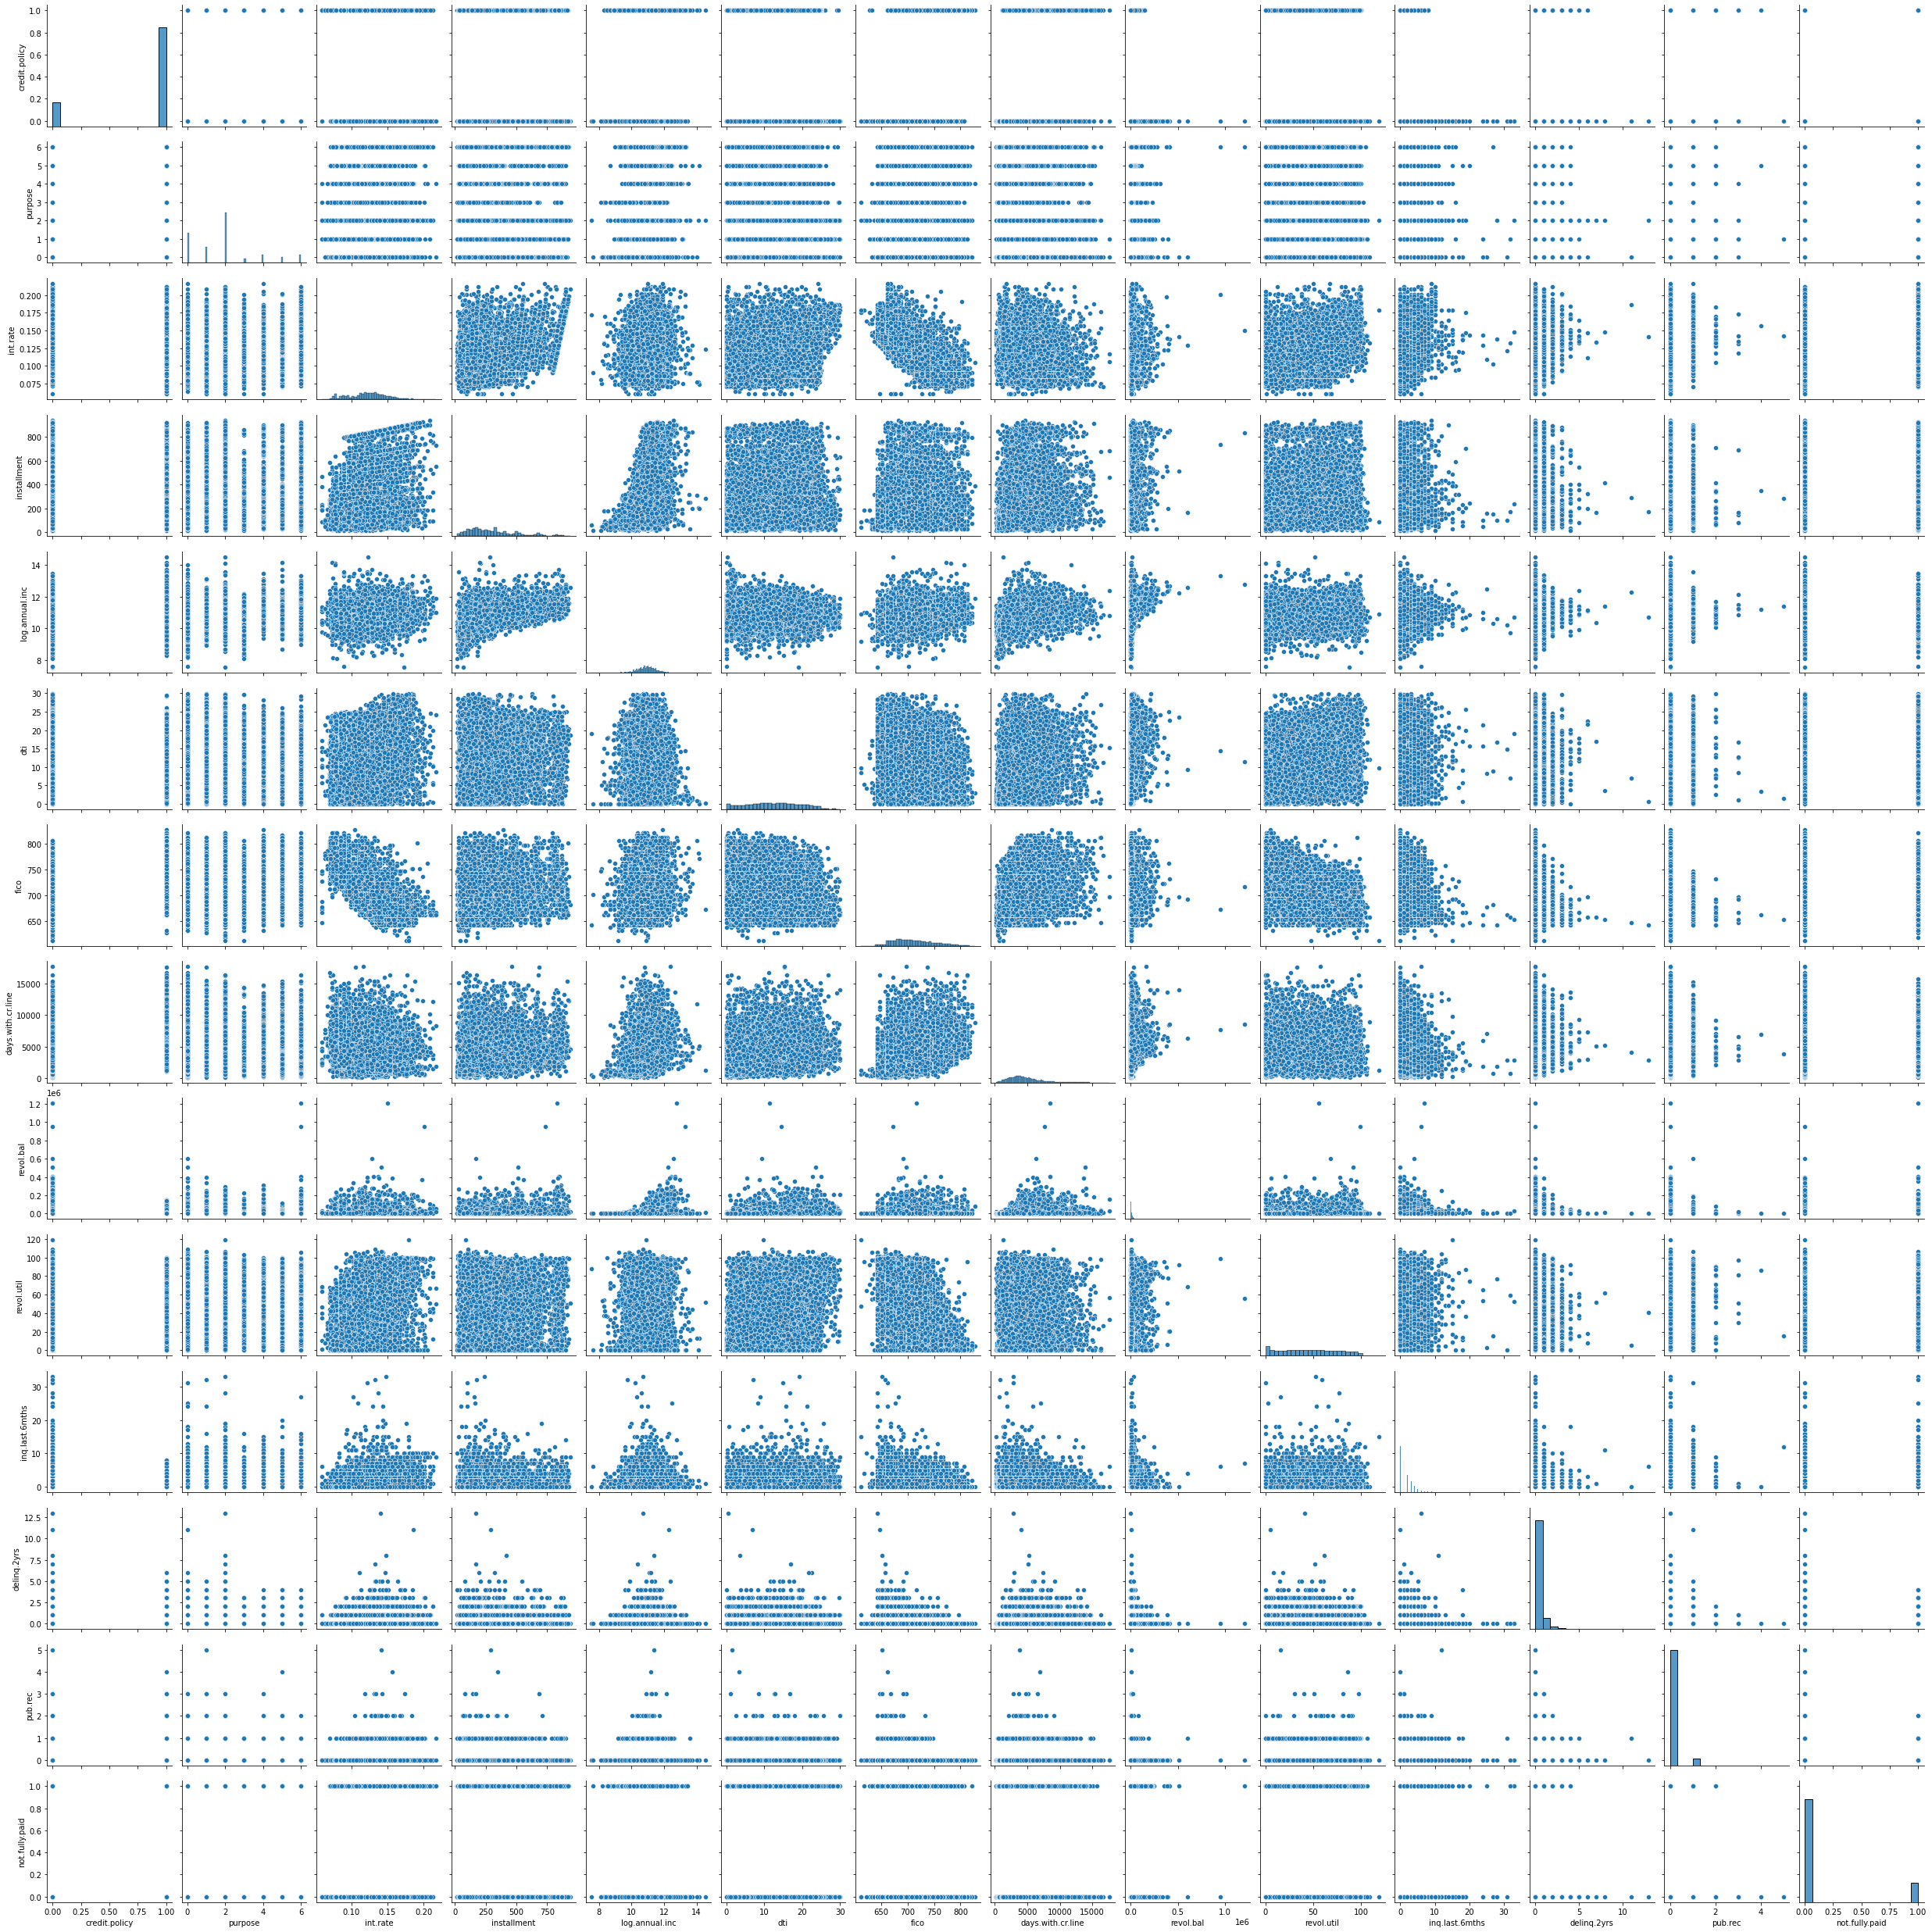

In [212]:
import seaborn as sns
sns.pairplot(df)

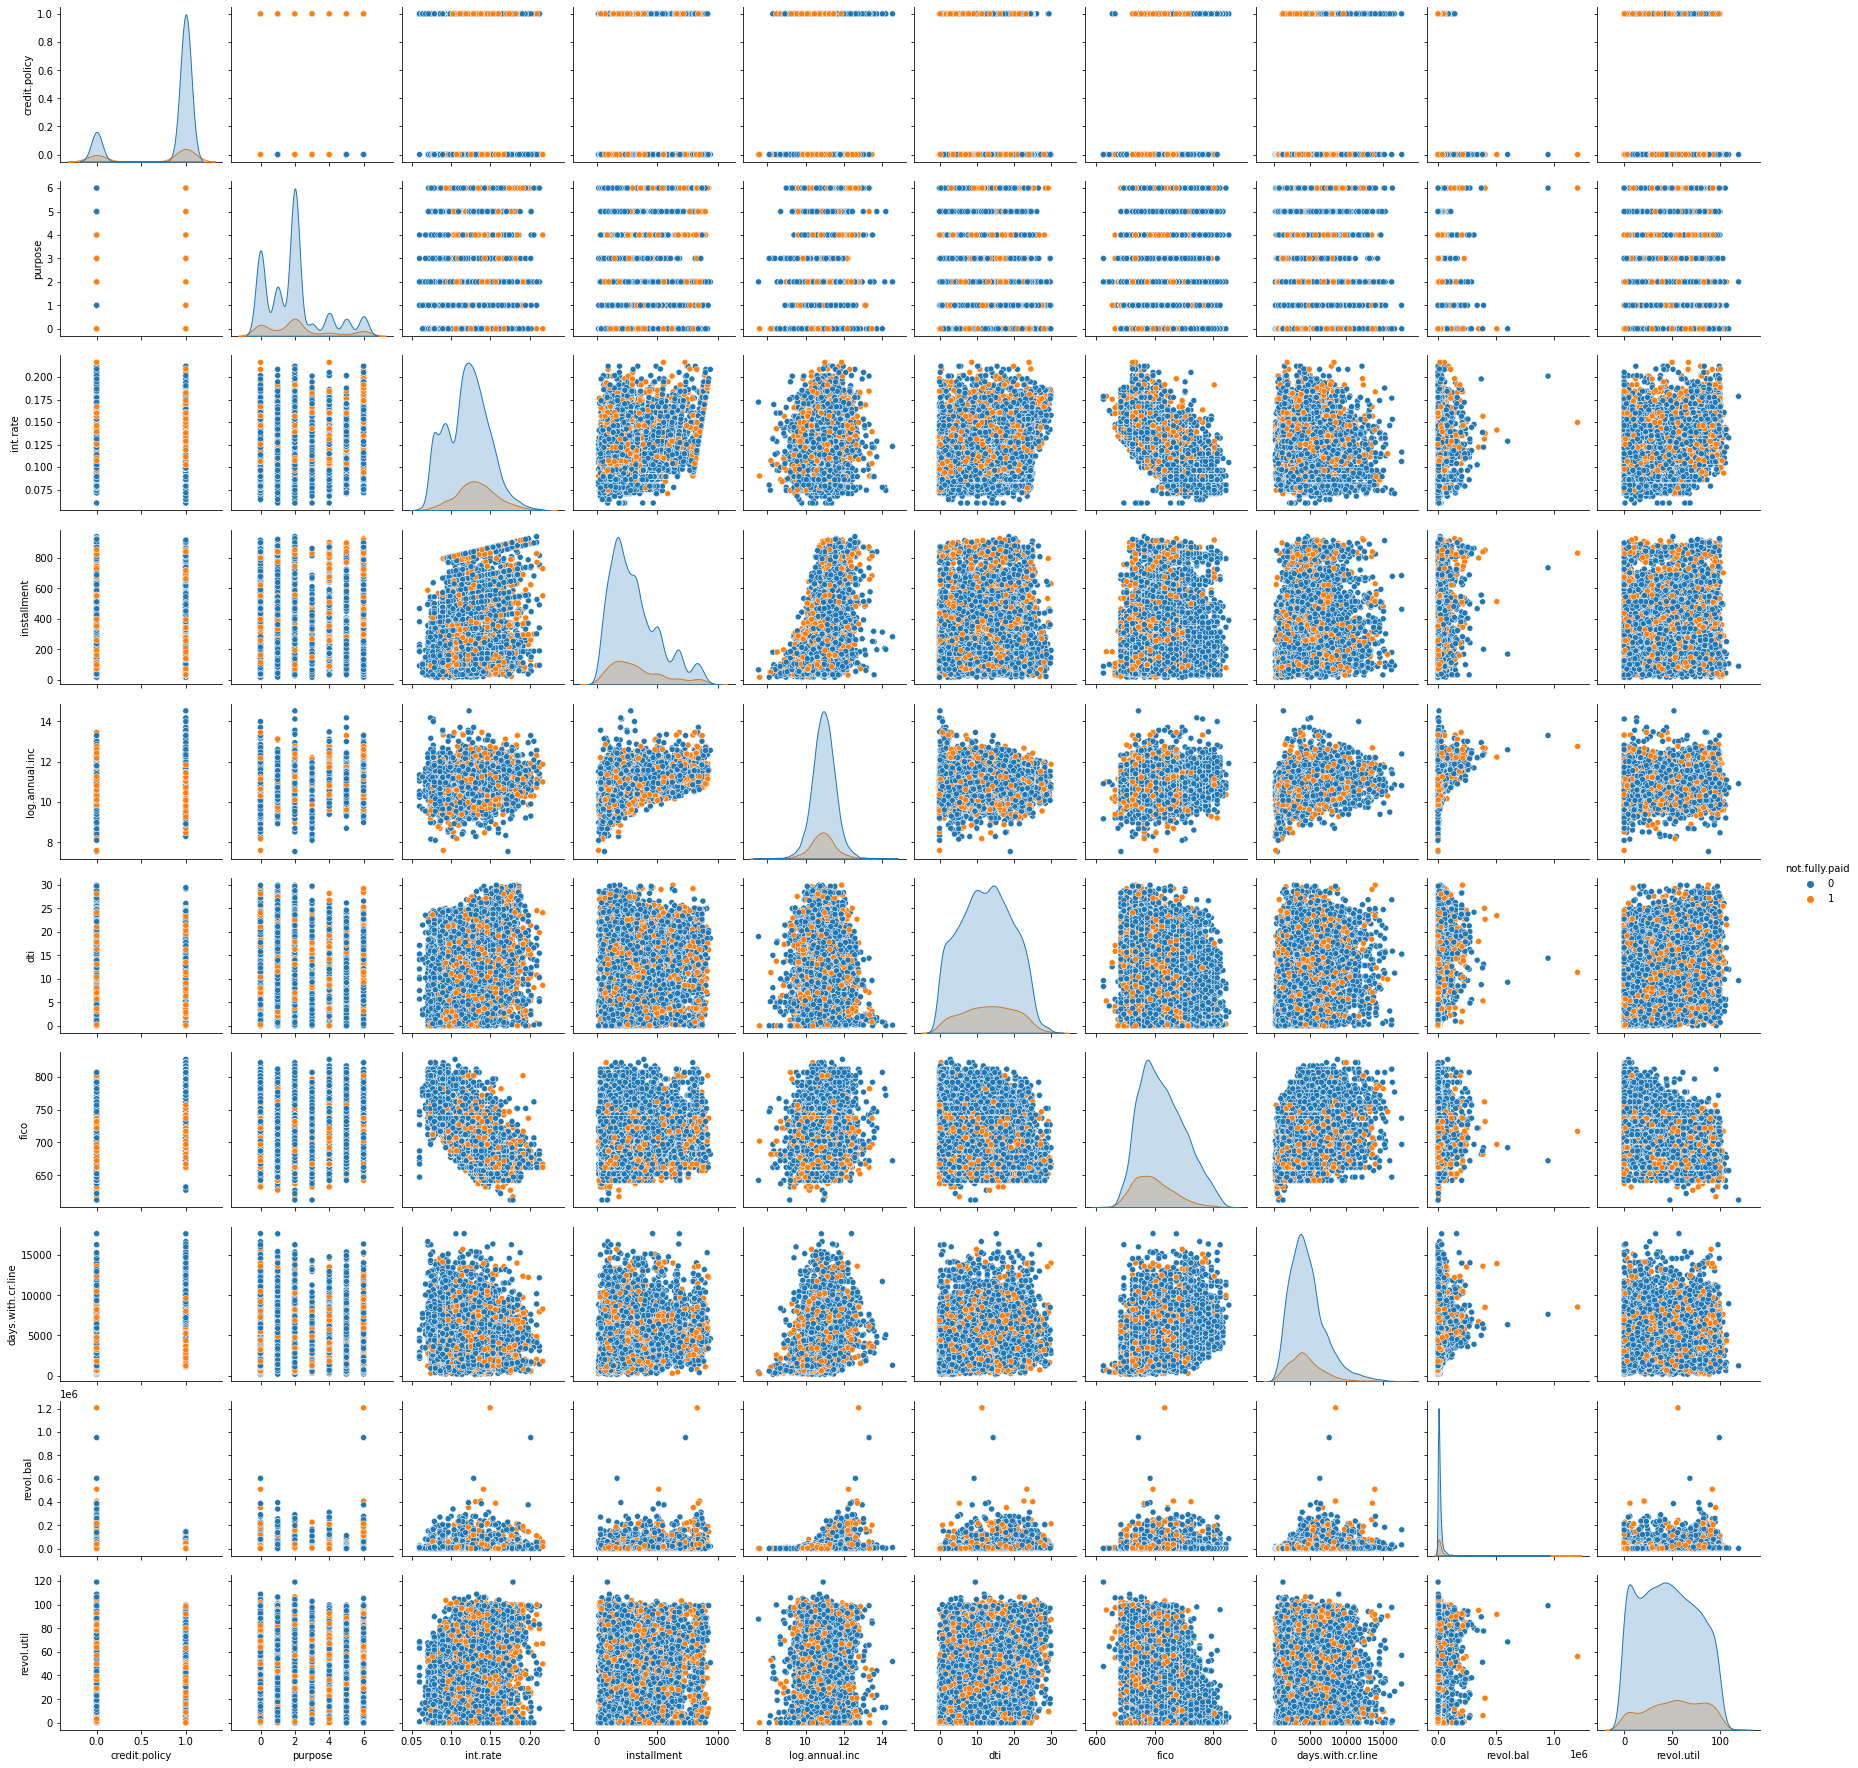

In [216]:
sns.pairplot(df,vars = ['credit.policy','purpose','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util'],hue = 'not.fully.paid')

In [217]:
X = df.drop(['not.fully.paid'],axis = 'columns')
X.head()

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        2    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  
0        0  
1        0  
2        0  
3        0  
4        0

In [218]:
y = df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [219]:
len(X)

9578

In [220]:
len(y)

9578

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)

In [223]:
len(X_test)

2395

In [224]:
len(y_test)

2395

In [225]:
len(X_train)

7183

In [226]:
len(y_train)

7183

In [227]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [228]:
model.score(X_test,y_test)

0.7473903966597077

[Text(0.3987134065978599, 0.9875, 'X[0] <= 0.5\ngini = 0.269\nsamples = 7183\nvalue = [6034, 1149]'),
 Text(0.1638609971829937, 0.9625, 'X[10] <= 4.5\ngini = 0.396\nsamples = 1421\nvalue = [1034, 387]'),
 Text(0.09745717095629297, 0.9375, 'X[2] <= 0.161\ngini = 0.366\nsamples = 904\nvalue = [686, 218]'),
 Text(0.030152980814573974, 0.9125, 'X[9] <= 1.3\ngini = 0.346\nsamples = 763\nvalue = [593, 170]'),
 Text(0.014295996624556353, 0.8875, 'X[5] <= 17.02\ngini = 0.485\nsamples = 46\nvalue = [27, 19]'),
 Text(0.010801419671887021, 0.8625, 'X[5] <= 6.54\ngini = 0.444\nsamples = 39\nvalue = [26, 13]'),
 Text(0.007624531533096722, 0.8375, 'X[2] <= 0.1\ngini = 0.49\nsamples = 21\nvalue = [9, 12]'),
 Text(0.0050830210220644805, 0.8125, 'X[10] <= 3.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.003812265766548361, 0.7875, 'X[5] <= 5.14\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.0025415105110322403, 0.7625, 'X[7] <= 323.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(

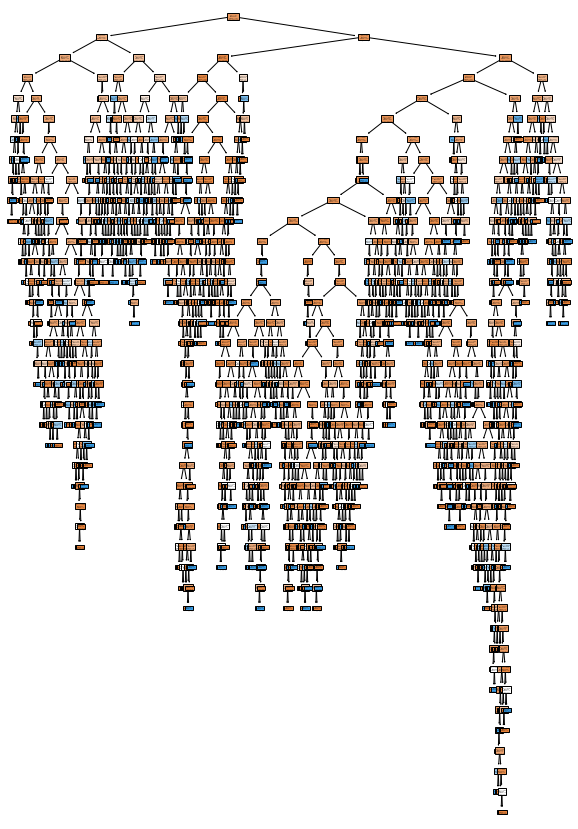

In [215]:
plt.figure(figsize=(10,15))
tree.plot_tree(model,filled = True)

In [229]:
pred = model.predict(X_test)
len(pred)


2395

In [230]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [231]:
confusion_matrix(y_test,pred)

array([[1700,  311],
       [ 294,   90]], dtype=int64)

In [232]:
accuracy_score(y_test,pred)

0.7473903966597077

In [233]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85      2011\n           1       0.22      0.23      0.23       384\n\n    accuracy                           0.75      2395\n   macro avg       0.54      0.54      0.54      2395\nweighted avg       0.75      0.75      0.75      2395\n'

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
rf = RandomForestClassifier(n_estimators= 20, random_state=8)

In [236]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=8)

In [237]:
rf_pred = rf.predict(X_test) 

In [238]:
print(rf_pred)

[0 0 0 ... 0 0 0]


In [239]:
len(rf_pred)

2395

In [240]:
len(y_test)

2395

In [241]:
confusion_matrix(y_test,rf_pred)

array([[1992,   19],
       [ 371,   13]], dtype=int64)

In [242]:
classification_report(y_test,rf_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91      2011\n           1       0.41      0.03      0.06       384\n\n    accuracy                           0.84      2395\n   macro avg       0.62      0.51      0.49      2395\nweighted avg       0.77      0.84      0.77      2395\n'

In [243]:
accuracy_score(y_test,rf_pred)

0.837160751565762